Assignment 3 - Pattern Recognition CPGEI<br>
Aluna: Mariana Bittencourt Junghans

In [2]:
import pandas as pd
import numpy as np

In [3]:
df_adl01 = pd.read_csv('/kaggle/input/accelerometer-data/DatasetDesafio/ADL/Train/adl-01-acc.csv',header=None)

In [4]:
df_adl01

,0,1,2,3,4
0,0,1.160735,-0.048638,1.149866,-0.150826
1,31,1.232825,-0.066079,1.221349,-0.154265
2,46,1.271040,-0.081063,1.259424,-0.151072
3,62,1.334946,-0.103908,1.315677,-0.200692
4,93,1.343159,-0.072465,1.311010,-0.282984
...,...,...,...,...,...
244,5116,1.159218,0.250067,0.616324,-0.949420
245,5132,1.147681,0.257436,0.596673,-0.945981
246,5148,1.083414,0.225994,0.581443,-0.885797
247,5179,1.078559,0.221572,0.623939,-0.851407


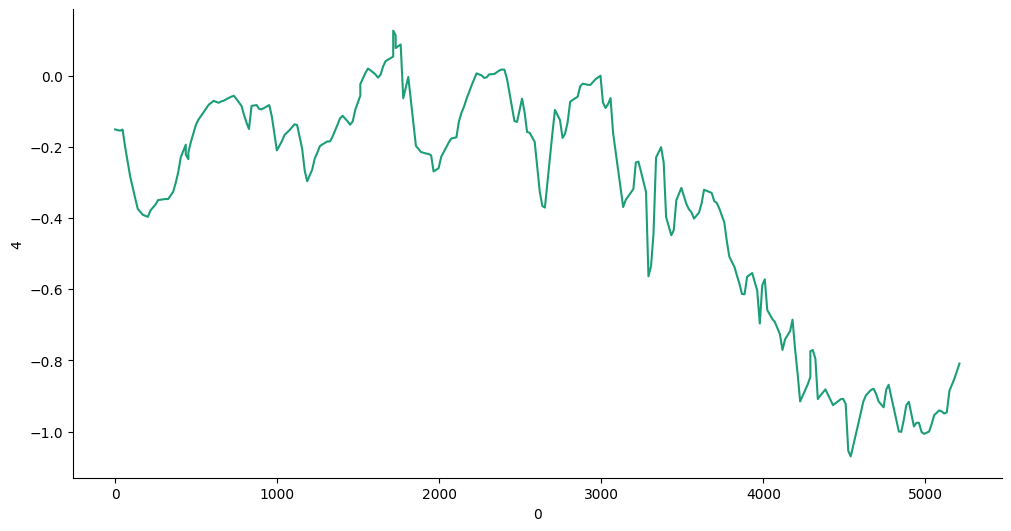

In [5]:
# @title 0 vs 4

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[0]
  ys = series[4]

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_adl01.sort_values(0, ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(0)
_ = plt.ylabel(4)

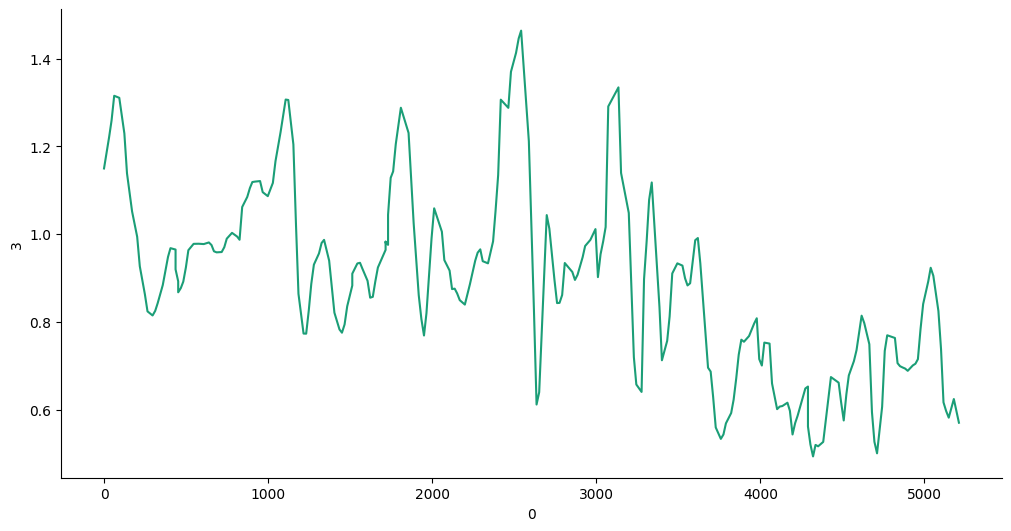

In [6]:
# @title 0 vs 3

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[0]
  ys = series[3]

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_adl01.sort_values(0, ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(0)
_ = plt.ylabel(3)

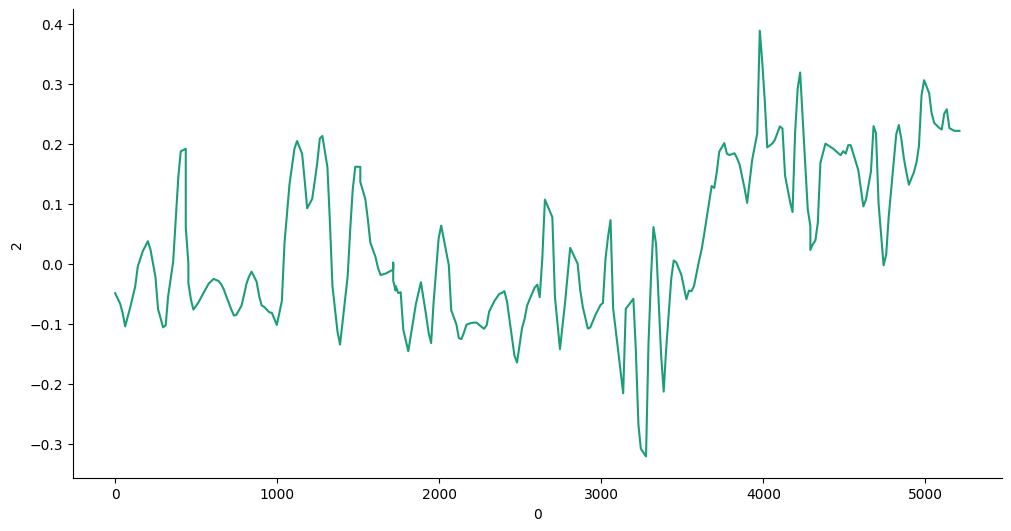

In [7]:
# @title 0 vs 2

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[0]
  ys = series[2]

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_adl01.sort_values(0, ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(0)
_ = plt.ylabel(2)

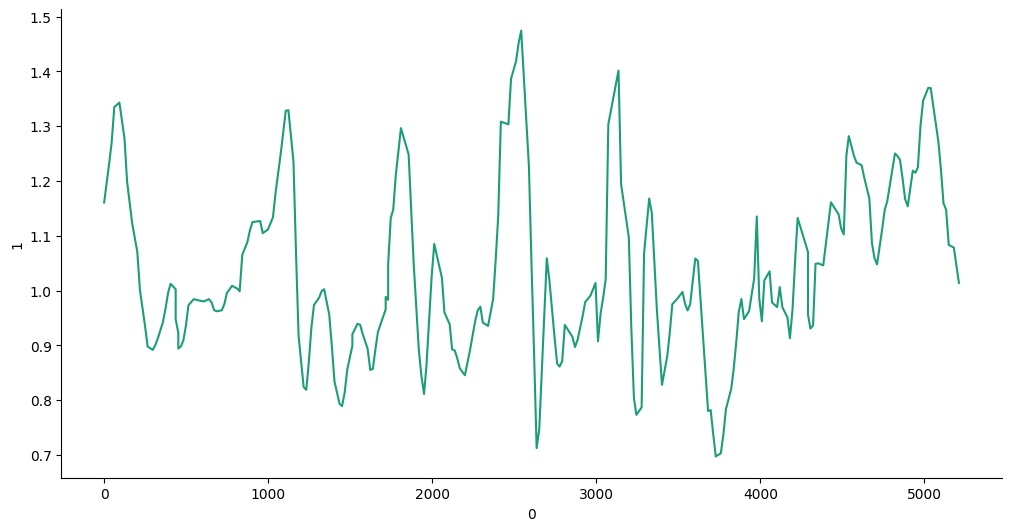

In [8]:
# @title 0 vs 1

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[0]
  ys = series[1]

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_adl01.sort_values(0, ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(0)
_ = plt.ylabel(1)

As métricas calculadas para cada coluna (Sv, Ax, Ay, Az) serão: Média, Valor máximo, Valor mínimo, Desvio Padrão, Delta (Diferença entre máximo e mínimo), Energia do sinal (soma dos quadrados) e Duração do evento (em segundos)

Função para calcular as métricas para cada coluna

In [9]:
def calculate_metrics(df_column):
  mean = df_column.mean()
  std_dev = df_column.std()
  max_value = df_column.max()
  min_value = df_column.min()
  range_value = max_value - min_value
  energy = np.sum(df_column**2)

  return [mean, std_dev, max_value, min_value, range_value, energy]

Loop para ler todos os arquivos e extrair as features de ADL (treino)

Loop para ler todos os arquivos e extrair as features de ADL (treino)

In [10]:
df_adl_train = pd.DataFrame(columns=['ID','Sv_mean','Sv_std','Sv_max','Sv_min','Sv_range','Sv_energy',
                                     'Ax_mean','Ax_std','Ax_max','Ax_min','Ax_range','Ax_energy',
                                     'Ay_mean','Ay_std','Ay_max','Ay_min','Ay_range','Ay_energy',
                                     'Az_mean','Az_std','Az_max','Az_min','Az_range','Az_energy','Duration'])

for i in range(1,40):
    if i < 10:
        try:  
            df = pd.read_csv(f'/kaggle/input/accelerometer-data/DatasetDesafio/ADL/Train/adl-0{i}-acc.csv',header=None)
        except:
            continue
    else:
        try:
            df = pd.read_csv(f'/kaggle/input/accelerometer-data/DatasetDesafio/ADL/Train/adl-{i}-acc.csv',header=None)
        except:
            continue
    df_i = pd.DataFrame(columns=['ID','Sv_mean','Sv_std','Sv_max','Sv_min','Sv_range','Sv_energy',
                                         'Ax_mean','Ax_std','Ax_max','Ax_min','Ax_range','Ax_energy',
                                         'Ay_mean','Ay_std','Ay_max','Ay_min','Ay_range','Ay_energy',
                                         'Az_mean','Az_std','Az_max','Az_min','Az_range','Az_energy','Duration'])
    df_i['ID'] = pd.Series(i)

    for j in range(1,len(df.columns)):
        metrics = calculate_metrics(df[df.columns[j]])
        if j == 1: #Sv
            df_i['Sv_mean'] = pd.Series(metrics[0])
            df_i['Sv_std'] = pd.Series(metrics[1])
            df_i['Sv_max'] = pd.Series(metrics[2])
            df_i['Sv_min'] = pd.Series(metrics[3])
            df_i['Sv_range'] = pd.Series(metrics[4])
            df_i['Sv_energy'] = pd.Series(metrics[5])
        elif j == 2:  #Ax
            df_i['Ax_mean'] = pd.Series(metrics[0])
            df_i['Ax_std'] = pd.Series(metrics[1])
            df_i['Ax_max'] = pd.Series(metrics[2])
            df_i['Ax_min'] = pd.Series(metrics[3])
            df_i['Ax_range'] = pd.Series(metrics[4])
            df_i['Ax_energy'] = pd.Series(metrics[5])
        elif j == 3:  #Ay
            df_i['Ay_mean'] = pd.Series(metrics[0])
            df_i['Ay_std'] = pd.Series(metrics[1])
            df_i['Ay_max'] = pd.Series(metrics[2])
            df_i['Ay_min'] = pd.Series(metrics[3])
            df_i['Ay_range'] = pd.Series(metrics[4])
            df_i['Ay_energy'] = pd.Series(metrics[5])
        else:   #Az
            df_i['Az_mean'] = pd.Series(metrics[0])
            df_i['Az_std'] = pd.Series(metrics[1])
            df_i['Az_max'] = pd.Series(metrics[2])
            df_i['Az_min'] = pd.Series(metrics[3])
            df_i['Az_range'] = pd.Series(metrics[4])
            df_i['Az_energy'] = pd.Series(metrics[5])

    df_i["Duration"] = df.iloc[-1,0] / 1000
    df_adl_train = pd.concat([df_adl_train,df_i],axis=0)

df_adl_train = df_adl_train.reset_index(drop=True)

/tmp/ipykernel_36/416093028.py:55: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_adl_train = pd.concat([df_adl_train,df_i],axis=0)


In [11]:
df_adl_train.tail()

,ID,Sv_mean,Sv_std,Sv_max,Sv_min,Sv_range,Sv_energy,Ax_mean,Ax_std,Ax_max,...,Ay_min,Ay_range,Ay_energy,Az_mean,Az_std,Az_max,Az_min,Az_range,Az_energy,Duration
29,33,1.048251,0.247304,4.577010,0.365706,4.211304,400.135156,-0.044732,0.284099,0.838634,...,-0.547789,1.912841,172.578685,0.594580,0.473528,4.447411,-0.056990,4.504400,199.101024,6.820
30,35,1.049933,0.197628,2.773198,0.304548,2.468651,576.375978,0.122779,0.346815,1.270724,...,-0.159670,2.457928,240.966085,-0.256746,0.681221,1.397723,-1.497946,2.895668,267.175796,10.030
31,36,1.002261,0.131383,1.960637,0.657981,1.302656,1577.625731,-0.458807,0.547385,0.499512,...,-0.312012,1.441895,732.884131,0.025603,0.191156,0.584961,-0.941406,1.526367,57.394331,12.005
32,37,1.005405,0.121396,1.859521,0.676256,1.183265,1580.398254,-0.558125,0.549470,0.658203,...,-0.227051,1.268555,529.637613,-0.030966,0.260248,0.581055,-0.926269,1.507324,105.780438,12.006
33,39,1.116889,0.148857,2.746013,0.589646,2.156367,399.901768,0.035623,0.368130,0.870567,...,0.006632,1.452010,221.137113,-0.516588,0.405967,0.116190,-2.706722,2.822913,135.811759,9.169


In [12]:
df_adl_train['Class'] = "ADL"

In [13]:
df_adl_train.tail()

,ID,Sv_mean,Sv_std,Sv_max,Sv_min,Sv_range,Sv_energy,Ax_mean,Ax_std,Ax_max,...,Ay_range,Ay_energy,Az_mean,Az_std,Az_max,Az_min,Az_range,Az_energy,Duration,Class
29,33,1.048251,0.247304,4.577010,0.365706,4.211304,400.135156,-0.044732,0.284099,0.838634,...,1.912841,172.578685,0.594580,0.473528,4.447411,-0.056990,4.504400,199.101024,6.820,ADL
30,35,1.049933,0.197628,2.773198,0.304548,2.468651,576.375978,0.122779,0.346815,1.270724,...,2.457928,240.966085,-0.256746,0.681221,1.397723,-1.497946,2.895668,267.175796,10.030,ADL
31,36,1.002261,0.131383,1.960637,0.657981,1.302656,1577.625731,-0.458807,0.547385,0.499512,...,1.441895,732.884131,0.025603,0.191156,0.584961,-0.941406,1.526367,57.394331,12.005,ADL
32,37,1.005405,0.121396,1.859521,0.676256,1.183265,1580.398254,-0.558125,0.549470,0.658203,...,1.268555,529.637613,-0.030966,0.260248,0.581055,-0.926269,1.507324,105.780438,12.006,ADL
33,39,1.116889,0.148857,2.746013,0.589646,2.156367,399.901768,0.035623,0.368130,0.870567,...,1.452010,221.137113,-0.516588,0.405967,0.116190,-2.706722,2.822913,135.811759,9.169,ADL


Loop para ler todos os arquivos e extrair as features de ADL (teste)

In [14]:
df_adl_test = pd.DataFrame(columns=['ID','Sv_mean','Sv_std','Sv_max','Sv_min','Sv_range','Sv_energy',
                                     'Ax_mean','Ax_std','Ax_max','Ax_min','Ax_range','Ax_energy',
                                     'Ay_mean','Ay_std','Ay_max','Ay_min','Ay_range','Ay_energy',
                                     'Az_mean','Az_std','Az_max','Az_min','Az_range','Az_energy','Duration'])

for i in range(6):  
    df = pd.read_csv(f'/kaggle/input/accelerometer-data/DatasetDesafio/ADL/Test/{i}.csv',header=None)
    df_i = pd.DataFrame(columns=['ID','Sv_mean','Sv_std','Sv_max','Sv_min','Sv_range','Sv_energy',
                                     'Ax_mean','Ax_std','Ax_max','Ax_min','Ax_range','Ax_energy',
                                     'Ay_mean','Ay_std','Ay_max','Ay_min','Ay_range','Ay_energy',
                                     'Az_mean','Az_std','Az_max','Az_min','Az_range','Az_energy','Duration'])
    df_i['ID'] = pd.Series(i)

    for j in range(1,len(df.columns)):
        metrics = calculate_metrics(df[df.columns[j]])
        if j == 1: #Sv
            df_i['Sv_mean'] = pd.Series(metrics[0])
            df_i['Sv_std'] = pd.Series(metrics[1])
            df_i['Sv_max'] = pd.Series(metrics[2])
            df_i['Sv_min'] = pd.Series(metrics[3])
            df_i['Sv_range'] = pd.Series(metrics[4])
            df_i['Sv_energy'] = pd.Series(metrics[5])
        elif j == 2:  #Ax
            df_i['Ax_mean'] = pd.Series(metrics[0])
            df_i['Ax_std'] = pd.Series(metrics[1])
            df_i['Ax_max'] = pd.Series(metrics[2])
            df_i['Ax_min'] = pd.Series(metrics[3])
            df_i['Ax_range'] = pd.Series(metrics[4])
            df_i['Ax_energy'] = pd.Series(metrics[5])
        elif j == 3:  #Ay
            df_i['Ay_mean'] = pd.Series(metrics[0])
            df_i['Ay_std'] = pd.Series(metrics[1])
            df_i['Ay_max'] = pd.Series(metrics[2])
            df_i['Ay_min'] = pd.Series(metrics[3])
            df_i['Ay_range'] = pd.Series(metrics[4])
            df_i['Ay_energy'] = pd.Series(metrics[5])
        else:   #Az
            df_i['Az_mean'] = pd.Series(metrics[0])
            df_i['Az_std'] = pd.Series(metrics[1])
            df_i['Az_max'] = pd.Series(metrics[2])
            df_i['Az_min'] = pd.Series(metrics[3])
            df_i['Az_range'] = pd.Series(metrics[4])
            df_i['Az_energy'] = pd.Series(metrics[5])

    df_i["Duration"] = df.iloc[-1,0] / 1000
    df_adl_test = pd.concat([df_adl_test,df_i],axis=0)

df_adl_test = df_adl_test.reset_index(drop=True)

/tmp/ipykernel_36/3462234214.py:46: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_adl_test = pd.concat([df_adl_test,df_i],axis=0)


In [15]:
df_adl_test.head()

,ID,Sv_mean,Sv_std,Sv_max,Sv_min,Sv_range,Sv_energy,Ax_mean,Ax_std,Ax_max,...,Ay_min,Ay_range,Ay_energy,Az_mean,Az_std,Az_max,Az_min,Az_range,Az_energy,Duration
0,0,0.974633,0.577838,2.944164,-0.136538,3.080701,180.682937,0.328270,0.215149,0.880906,...,-0.066154,1.697243,55.067153,0.711625,0.484816,2.313328,-0.161171,2.474499,104.310329,2.425
1,1,1.034797,0.418736,2.535667,-0.129520,2.665187,418.529163,-0.061397,0.437563,0.719172,...,-0.423250,2.724222,320.109220,0.247052,0.174491,0.934310,-0.177557,1.111867,30.707484,9.115
2,2,1.125313,0.476343,3.731273,-0.452330,4.183603,606.024962,-0.019333,0.359912,1.071069,...,-0.646036,3.197504,398.508099,-0.472086,0.378692,0.366295,-2.779656,3.145951,148.563295,11.210
3,3,1.023122,0.424218,2.634675,-0.369474,3.004148,383.789234,-0.292519,0.445837,0.920774,...,-0.515872,2.324563,202.082612,0.358620,0.417074,1.664929,-0.547366,2.212295,94.527089,6.507
4,4,1.030468,0.437429,2.641648,-0.339369,2.981017,1913.458418,-0.471230,0.500298,0.733698,...,-1.558818,2.469580,319.368396,0.575388,0.451394,1.639418,-0.815177,2.454595,816.478708,11.905


In [16]:
df_adl_test['Class'] = "ADL"

In [17]:
df_adl_test.head()

,ID,Sv_mean,Sv_std,Sv_max,Sv_min,Sv_range,Sv_energy,Ax_mean,Ax_std,Ax_max,...,Ay_range,Ay_energy,Az_mean,Az_std,Az_max,Az_min,Az_range,Az_energy,Duration,Class
0,0,0.974633,0.577838,2.944164,-0.136538,3.080701,180.682937,0.328270,0.215149,0.880906,...,1.697243,55.067153,0.711625,0.484816,2.313328,-0.161171,2.474499,104.310329,2.425,ADL
1,1,1.034797,0.418736,2.535667,-0.129520,2.665187,418.529163,-0.061397,0.437563,0.719172,...,2.724222,320.109220,0.247052,0.174491,0.934310,-0.177557,1.111867,30.707484,9.115,ADL
2,2,1.125313,0.476343,3.731273,-0.452330,4.183603,606.024962,-0.019333,0.359912,1.071069,...,3.197504,398.508099,-0.472086,0.378692,0.366295,-2.779656,3.145951,148.563295,11.210,ADL
3,3,1.023122,0.424218,2.634675,-0.369474,3.004148,383.789234,-0.292519,0.445837,0.920774,...,2.324563,202.082612,0.358620,0.417074,1.664929,-0.547366,2.212295,94.527089,6.507,ADL
4,4,1.030468,0.437429,2.641648,-0.339369,2.981017,1913.458418,-0.471230,0.500298,0.733698,...,2.469580,319.368396,0.575388,0.451394,1.639418,-0.815177,2.454595,816.478708,11.905,ADL


Loop para ler todos os arquivos e extrair as features de Fall (treino)

In [18]:
df_fall_train = pd.DataFrame(columns=['ID','Sv_mean','Sv_std','Sv_max','Sv_min','Sv_range','Sv_energy',
                                     'Ax_mean','Ax_std','Ax_max','Ax_min','Ax_range','Ax_energy',
                                     'Ay_mean','Ay_std','Ay_max','Ay_min','Ay_range','Ay_energy',
                                     'Az_mean','Az_std','Az_max','Az_min','Az_range','Az_energy','Duration'])

for i in range(1,31):
    if i < 10:
        try:  
            df = pd.read_csv(f'/kaggle/input/accelerometer-data/DatasetDesafio/Fall/Train/fall-0{i}-acc.csv',header=None)
        except:
            continue
    else:
        try:
            df = pd.read_csv(f'/kaggle/input/accelerometer-data/DatasetDesafio/Fall/Train/fall-{i}-acc.csv',header=None)
        except:
            continue
    df_i = pd.DataFrame(columns=['ID','Sv_mean','Sv_std','Sv_max','Sv_min','Sv_range','Sv_energy',
                                         'Ax_mean','Ax_std','Ax_max','Ax_min','Ax_range','Ax_energy',
                                         'Ay_mean','Ay_std','Ay_max','Ay_min','Ay_range','Ay_energy',
                                         'Az_mean','Az_std','Az_max','Az_min','Az_range','Az_energy','Duration'])
    df_i['ID'] = pd.Series(i)

    for j in range(1,len(df.columns)):
        metrics = calculate_metrics(df[df.columns[j]])
        if j == 1: #Sv
            df_i['Sv_mean'] = pd.Series(metrics[0])
            df_i['Sv_std'] = pd.Series(metrics[1])
            df_i['Sv_max'] = pd.Series(metrics[2])
            df_i['Sv_min'] = pd.Series(metrics[3])
            df_i['Sv_range'] = pd.Series(metrics[4])
            df_i['Sv_energy'] = pd.Series(metrics[5])
        elif j == 2:  #Ax
            df_i['Ax_mean'] = pd.Series(metrics[0])
            df_i['Ax_std'] = pd.Series(metrics[1])
            df_i['Ax_max'] = pd.Series(metrics[2])
            df_i['Ax_min'] = pd.Series(metrics[3])
            df_i['Ax_range'] = pd.Series(metrics[4])
            df_i['Ax_energy'] = pd.Series(metrics[5])
        elif j == 3:  #Ay
            df_i['Ay_mean'] = pd.Series(metrics[0])
            df_i['Ay_std'] = pd.Series(metrics[1])
            df_i['Ay_max'] = pd.Series(metrics[2])
            df_i['Ay_min'] = pd.Series(metrics[3])
            df_i['Ay_range'] = pd.Series(metrics[4])
            df_i['Ay_energy'] = pd.Series(metrics[5])
        else:   #Az
            df_i['Az_mean'] = pd.Series(metrics[0])
            df_i['Az_std'] = pd.Series(metrics[1])
            df_i['Az_max'] = pd.Series(metrics[2])
            df_i['Az_min'] = pd.Series(metrics[3])
            df_i['Az_range'] = pd.Series(metrics[4])
            df_i['Az_energy'] = pd.Series(metrics[5])

    df_i["Duration"] = df.iloc[-1,0] / 1000
    df_fall_train = pd.concat([df_fall_train,df_i],axis=0)

df_fall_train = df_fall_train.reset_index(drop=True)
df_fall_train["Class"] = "Fall"

/tmp/ipykernel_36/3149306932.py:55: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_fall_train = pd.concat([df_fall_train,df_i],axis=0)


In [19]:
df_fall_train.tail()

,ID,Sv_mean,Sv_std,Sv_max,Sv_min,Sv_range,Sv_energy,Ax_mean,Ax_std,Ax_max,...,Ay_range,Ay_energy,Az_mean,Az_std,Az_max,Az_min,Az_range,Az_energy,Duration,Class
19,24,1.149325,0.518473,6.933637,0.157904,6.775734,359.017323,0.229609,0.361618,0.679455,...,5.957639,170.797628,0.266872,0.762412,5.126866,-0.838634,5.965499,146.882131,2.700,Fall
20,26,1.174166,0.709329,8.533723,0.219442,8.314281,368.332231,-0.271013,0.554602,0.500134,...,5.213088,101.080929,0.494142,0.862370,6.571016,-1.141514,7.712530,192.876715,2.860,Fall
21,27,1.115698,0.634436,5.885568,0.156812,5.728756,475.664910,0.205741,0.570546,2.601140,...,3.678540,154.911235,0.568346,0.649300,5.356790,-0.344149,5.700939,214.770059,4.655,Fall
22,29,1.192318,0.765940,8.400628,0.346516,8.054112,567.758830,0.192632,0.683058,2.710206,...,5.176732,186.386484,0.524869,0.756382,7.965299,-0.708441,8.673740,239.298953,4.030,Fall
23,30,1.105031,0.355510,4.436042,0.316632,4.119410,350.218618,0.108188,0.609375,2.657392,...,4.567531,131.161418,0.465912,0.494754,2.378339,-0.894641,3.272980,119.837543,3.475,Fall


Loop para ler todos os arquivos e extrair as features de Fall (teste)

In [20]:
df_fall_test = pd.DataFrame(columns=['ID','Sv_mean','Sv_std','Sv_max','Sv_min','Sv_range','Sv_energy',
                                     'Ax_mean','Ax_std','Ax_max','Ax_min','Ax_range','Ax_energy',
                                     'Ay_mean','Ay_std','Ay_max','Ay_min','Ay_range','Ay_energy',
                                     'Az_mean','Az_std','Az_max','Az_min','Az_range','Az_energy','Duration'])

for i in range(6,12):  
    df = pd.read_csv(f'/kaggle/input/accelerometer-data/DatasetDesafio/Fall/Test/{i}.csv',header=None)
    df_i = pd.DataFrame(columns=['ID','Sv_mean','Sv_std','Sv_max','Sv_min','Sv_range','Sv_energy',
                                     'Ax_mean','Ax_std','Ax_max','Ax_min','Ax_range','Ax_energy',
                                     'Ay_mean','Ay_std','Ay_max','Ay_min','Ay_range','Ay_energy',
                                     'Az_mean','Az_std','Az_max','Az_min','Az_range','Az_energy','Duration'])
    df_i['ID'] = pd.Series(i)

    for j in range(1,len(df.columns)):
        metrics = calculate_metrics(df[df.columns[j]])
        if j == 1: #Sv
            df_i['Sv_mean'] = pd.Series(metrics[0])
            df_i['Sv_std'] = pd.Series(metrics[1])
            df_i['Sv_max'] = pd.Series(metrics[2])
            df_i['Sv_min'] = pd.Series(metrics[3])
            df_i['Sv_range'] = pd.Series(metrics[4])
            df_i['Sv_energy'] = pd.Series(metrics[5])
        elif j == 2:  #Ax
            df_i['Ax_mean'] = pd.Series(metrics[0])
            df_i['Ax_std'] = pd.Series(metrics[1])
            df_i['Ax_max'] = pd.Series(metrics[2])
            df_i['Ax_min'] = pd.Series(metrics[3])
            df_i['Ax_range'] = pd.Series(metrics[4])
            df_i['Ax_energy'] = pd.Series(metrics[5])
        elif j == 3:  #Ay
            df_i['Ay_mean'] = pd.Series(metrics[0])
            df_i['Ay_std'] = pd.Series(metrics[1])
            df_i['Ay_max'] = pd.Series(metrics[2])
            df_i['Ay_min'] = pd.Series(metrics[3])
            df_i['Ay_range'] = pd.Series(metrics[4])
            df_i['Ay_energy'] = pd.Series(metrics[5])
        else:   #Az
            df_i['Az_mean'] = pd.Series(metrics[0])
            df_i['Az_std'] = pd.Series(metrics[1])
            df_i['Az_max'] = pd.Series(metrics[2])
            df_i['Az_min'] = pd.Series(metrics[3])
            df_i['Az_range'] = pd.Series(metrics[4])
            df_i['Az_energy'] = pd.Series(metrics[5])

    df_i["Duration"] = df.iloc[-1,0] / 1000
    df_fall_test = pd.concat([df_fall_test,df_i],axis=0)

df_fall_test = df_fall_test.reset_index(drop=True)
df_fall_test['Class'] = 'Fall'

/tmp/ipykernel_36/3483128105.py:46: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_fall_test = pd.concat([df_fall_test,df_i],axis=0)


In [21]:
df_fall_test.head()

,ID,Sv_mean,Sv_std,Sv_max,Sv_min,Sv_range,Sv_energy,Ax_mean,Ax_std,Ax_max,...,Ay_range,Ay_energy,Az_mean,Az_std,Az_max,Az_min,Az_range,Az_energy,Duration,Class
0,6,1.120018,0.635879,4.128821,-0.260866,4.389687,364.527562,0.247167,0.481810,3.402833,...,4.819081,204.757651,0.445530,0.452834,1.758636,-0.454893,2.213529,88.577088,3.743,Fall
1,7,1.131434,0.734957,9.099602,-0.294230,9.393832,467.277725,0.640858,0.544768,1.958207,...,4.570285,97.391630,0.323495,0.787878,8.206855,-1.586195,9.793050,185.807290,7.625,Fall
2,8,1.292800,1.084333,9.204763,-0.768083,9.972846,730.530955,0.519001,0.888892,7.668606,...,4.660005,216.976421,0.298466,0.894159,5.270322,-5.635713,10.906036,227.571155,3.705,Fall
3,9,1.179924,0.745851,4.894618,-0.669581,5.564199,498.263353,0.308241,0.383394,1.851719,...,4.812033,181.123269,0.590987,0.799746,4.607415,-1.086585,5.694000,252.508515,3.910,Fall
4,10,1.200298,1.103746,8.725991,-0.453822,9.179813,394.968400,0.252815,1.029476,3.310016,...,12.910684,165.951829,-0.003137,0.721441,1.112526,-4.679121,5.791647,77.032095,2.106,Fall


Criar os datasets de treino e teste juntando ADL e Fall

In [22]:
df_train = pd.concat([df_adl_train,df_fall_train],axis=0)
df_test = pd.concat([df_adl_test,df_fall_test],axis=0)

In [23]:
df_train.head(35)

,ID,Sv_mean,Sv_std,Sv_max,Sv_min,Sv_range,Sv_energy,Ax_mean,Ax_std,Ax_max,...,Ay_range,Ay_energy,Az_mean,Az_std,Az_max,Az_min,Az_range,Az_energy,Duration,Class
0,1,1.028018,0.156580,1.474426,0.697416,0.777010,269.228791,0.034285,0.130192,0.388365,...,0.971282,206.075485,-0.354364,0.332326,0.126999,-1.070032,1.197030,58.657036,5.210,ADL
1,2,1.018103,0.150227,1.546876,0.614151,0.932725,335.712998,0.203983,0.285513,0.844038,...,1.141514,256.768315,-0.245687,0.256931,0.163600,-1.011814,1.175413,39.994924,6.100,ADL
2,3,1.038808,0.161866,1.771360,0.608425,1.162935,317.201370,0.091391,0.152468,0.418334,...,1.321818,262.215673,-0.321627,0.238378,0.103908,-0.879656,0.983564,45.940101,6.100,ADL
3,4,1.075199,0.157467,1.532783,0.672452,0.860331,285.740567,0.265853,0.303762,0.839862,...,1.969094,141.520617,-0.533385,0.386653,0.063622,-1.152568,1.216191,104.878437,5.007,ADL
4,5,1.049108,0.156039,1.541192,0.692663,0.848529,349.842868,0.296694,0.311497,0.969808,...,1.543145,202.681097,-0.415437,0.340924,0.143211,-1.063153,1.206365,89.705859,6.021,ADL
5,6,1.042542,0.158845,1.549396,0.549515,0.999881,422.582600,0.082733,0.311630,0.760273,...,1.887048,272.103955,-0.396580,0.367933,0.078115,-1.187941,1.266057,111.071733,7.800,ADL
6,8,1.023265,0.132050,1.528824,0.660888,0.867936,303.367523,0.049472,0.122938,0.493747,...,1.175413,246.872679,-0.283851,0.317019,0.451496,-1.362350,1.813846,51.505030,6.021,ADL
7,9,1.013322,0.118584,1.432775,0.677045,0.755730,270.615730,0.066508,0.133769,0.436266,...,0.956298,208.209310,-0.348382,0.311092,0.125279,-1.063645,1.188924,56.621823,5.055,ADL
8,10,1.036172,0.148915,1.575897,0.646847,0.929050,516.112950,0.180500,0.211114,0.704020,...,1.832761,281.441991,-0.021911,0.649307,1.216191,-1.189661,2.405851,198.378216,10.000,ADL
9,11,1.028624,0.135805,1.581723,0.553655,1.028068,504.865051,0.290582,0.360779,1.169764,...,1.553462,311.667470,-0.085910,0.436622,0.830527,-1.109335,1.939862,92.680623,10.016,ADL


In [24]:
df_test.head(20)

,ID,Sv_mean,Sv_std,Sv_max,Sv_min,Sv_range,Sv_energy,Ax_mean,Ax_std,Ax_max,...,Ay_range,Ay_energy,Az_mean,Az_std,Az_max,Az_min,Az_range,Az_energy,Duration,Class
0,0,0.974633,0.577838,2.944164,-0.136538,3.080701,180.682937,0.328270,0.215149,0.880906,...,1.697243,55.067153,0.711625,0.484816,2.313328,-0.161171,2.474499,104.310329,2.425,ADL
1,1,1.034797,0.418736,2.535667,-0.129520,2.665187,418.529163,-0.061397,0.437563,0.719172,...,2.724222,320.109220,0.247052,0.174491,0.934310,-0.177557,1.111867,30.707484,9.115,ADL
2,2,1.125313,0.476343,3.731273,-0.452330,4.183603,606.024962,-0.019333,0.359912,1.071069,...,3.197504,398.508099,-0.472086,0.378692,0.366295,-2.779656,3.145951,148.563295,11.210,ADL
3,3,1.023122,0.424218,2.634675,-0.369474,3.004148,383.789234,-0.292519,0.445837,0.920774,...,2.324563,202.082612,0.358620,0.417074,1.664929,-0.547366,2.212295,94.527089,6.507,ADL
4,4,1.030468,0.437429,2.641648,-0.339369,2.981017,1913.458418,-0.471230,0.500298,0.733698,...,2.469580,319.368396,0.575388,0.451394,1.639418,-0.815177,2.454595,816.478708,11.905,ADL
5,5,1.020311,0.425613,2.715023,-0.451640,3.166663,344.474107,0.013779,0.164903,0.473000,...,2.369146,274.251041,-0.259228,0.376352,0.794016,-1.232728,2.026744,58.751188,6.006,ADL
0,6,1.120018,0.635879,4.128821,-0.260866,4.389687,364.527562,0.247167,0.481810,3.402833,...,4.819081,204.757651,0.445530,0.452834,1.758636,-0.454893,2.213529,88.577088,3.743,Fall
1,7,1.131434,0.734957,9.099602,-0.294230,9.393832,467.277725,0.640858,0.544768,1.958207,...,4.570285,97.391630,0.323495,0.787878,8.206855,-1.586195,9.793050,185.807290,7.625,Fall
2,8,1.292800,1.084333,9.204763,-0.768083,9.972846,730.530955,0.519001,0.888892,7.668606,...,4.660005,216.976421,0.298466,0.894159,5.270322,-5.635713,10.906036,227.571155,3.705,Fall
3,9,1.179924,0.745851,4.894618,-0.669581,5.564199,498.263353,0.308241,0.383394,1.851719,...,4.812033,181.123269,0.590987,0.799746,4.607415,-1.086585,5.694000,252.508515,3.910,Fall


In [25]:
df_train = df_train.reset_index()
df_test = df_test.reset_index()

In [26]:
df_train = df_train.drop('ID',axis=1)
df_test = df_test.drop('ID',axis=1)

In [27]:
df_train = df_train.drop('index',axis=1)
df_test = df_test.drop('index',axis=1)

In [28]:
df_train.head()

,Sv_mean,Sv_std,Sv_max,Sv_min,Sv_range,Sv_energy,Ax_mean,Ax_std,Ax_max,Ax_min,...,Ay_range,Ay_energy,Az_mean,Az_std,Az_max,Az_min,Az_range,Az_energy,Duration,Class
0,1.028018,0.156580,1.474426,0.697416,0.777010,269.228791,0.034285,0.130192,0.388365,-0.320322,...,0.971282,206.075485,-0.354364,0.332326,0.126999,-1.070032,1.197030,58.657036,5.210,ADL
1,1.018103,0.150227,1.546876,0.614151,0.932725,335.712998,0.203983,0.285513,0.844038,-0.234346,...,1.141514,256.768315,-0.245687,0.256931,0.163600,-1.011814,1.175413,39.994924,6.100,ADL
2,1.038808,0.161866,1.771360,0.608425,1.162935,317.201370,0.091391,0.152468,0.418334,-0.219361,...,1.321818,262.215673,-0.321627,0.238378,0.103908,-0.879656,0.983564,45.940101,6.100,ADL
3,1.075199,0.157467,1.532783,0.672452,0.860331,285.740567,0.265853,0.303762,0.839862,-0.145176,...,1.969094,141.520617,-0.533385,0.386653,0.063622,-1.152568,1.216191,104.878437,5.007,ADL
4,1.049108,0.156039,1.541192,0.692663,0.848529,349.842868,0.296694,0.311497,0.969808,-0.173180,...,1.543145,202.681097,-0.415437,0.340924,0.143211,-1.063153,1.206365,89.705859,6.021,ADL


In [29]:
df_test.head()

,Sv_mean,Sv_std,Sv_max,Sv_min,Sv_range,Sv_energy,Ax_mean,Ax_std,Ax_max,Ax_min,...,Ay_range,Ay_energy,Az_mean,Az_std,Az_max,Az_min,Az_range,Az_energy,Duration,Class
0,0.974633,0.577838,2.944164,-0.136538,3.080701,180.682937,0.328270,0.215149,0.880906,-0.192761,...,1.697243,55.067153,0.711625,0.484816,2.313328,-0.161171,2.474499,104.310329,2.425,ADL
1,1.034797,0.418736,2.535667,-0.129520,2.665187,418.529163,-0.061397,0.437563,0.719172,-1.437567,...,2.724222,320.109220,0.247052,0.174491,0.934310,-0.177557,1.111867,30.707484,9.115,ADL
2,1.125313,0.476343,3.731273,-0.452330,4.183603,606.024962,-0.019333,0.359912,1.071069,-0.701054,...,3.197504,398.508099,-0.472086,0.378692,0.366295,-2.779656,3.145951,148.563295,11.210,ADL
3,1.023122,0.424218,2.634675,-0.369474,3.004148,383.789234,-0.292519,0.445837,0.920774,-1.397023,...,2.324563,202.082612,0.358620,0.417074,1.664929,-0.547366,2.212295,94.527089,6.507,ADL
4,1.030468,0.437429,2.641648,-0.339369,2.981017,1913.458418,-0.471230,0.500298,0.733698,-1.902290,...,2.469580,319.368396,0.575388,0.451394,1.639418,-0.815177,2.454595,816.478708,11.905,ADL


In [30]:
binary_class = np.where(np.array(df_train['Class']) == "Fall", 1, 0)

In [31]:
binary_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [32]:
df_train['Class'] = pd.Series(binary_class)

In [33]:
df_train.head()

,Sv_mean,Sv_std,Sv_max,Sv_min,Sv_range,Sv_energy,Ax_mean,Ax_std,Ax_max,Ax_min,...,Ay_range,Ay_energy,Az_mean,Az_std,Az_max,Az_min,Az_range,Az_energy,Duration,Class
0,1.028018,0.156580,1.474426,0.697416,0.777010,269.228791,0.034285,0.130192,0.388365,-0.320322,...,0.971282,206.075485,-0.354364,0.332326,0.126999,-1.070032,1.197030,58.657036,5.210,0
1,1.018103,0.150227,1.546876,0.614151,0.932725,335.712998,0.203983,0.285513,0.844038,-0.234346,...,1.141514,256.768315,-0.245687,0.256931,0.163600,-1.011814,1.175413,39.994924,6.100,0
2,1.038808,0.161866,1.771360,0.608425,1.162935,317.201370,0.091391,0.152468,0.418334,-0.219361,...,1.321818,262.215673,-0.321627,0.238378,0.103908,-0.879656,0.983564,45.940101,6.100,0
3,1.075199,0.157467,1.532783,0.672452,0.860331,285.740567,0.265853,0.303762,0.839862,-0.145176,...,1.969094,141.520617,-0.533385,0.386653,0.063622,-1.152568,1.216191,104.878437,5.007,0
4,1.049108,0.156039,1.541192,0.692663,0.848529,349.842868,0.296694,0.311497,0.969808,-0.173180,...,1.543145,202.681097,-0.415437,0.340924,0.143211,-1.063153,1.206365,89.705859,6.021,0


In [34]:
binary_class = np.where(np.array(df_test['Class']) == "Fall", 1, 0)

In [35]:
df_test['Class'] = pd.Series(binary_class)

In [36]:
df_test.head()

,Sv_mean,Sv_std,Sv_max,Sv_min,Sv_range,Sv_energy,Ax_mean,Ax_std,Ax_max,Ax_min,...,Ay_range,Ay_energy,Az_mean,Az_std,Az_max,Az_min,Az_range,Az_energy,Duration,Class
0,0.974633,0.577838,2.944164,-0.136538,3.080701,180.682937,0.328270,0.215149,0.880906,-0.192761,...,1.697243,55.067153,0.711625,0.484816,2.313328,-0.161171,2.474499,104.310329,2.425,0
1,1.034797,0.418736,2.535667,-0.129520,2.665187,418.529163,-0.061397,0.437563,0.719172,-1.437567,...,2.724222,320.109220,0.247052,0.174491,0.934310,-0.177557,1.111867,30.707484,9.115,0
2,1.125313,0.476343,3.731273,-0.452330,4.183603,606.024962,-0.019333,0.359912,1.071069,-0.701054,...,3.197504,398.508099,-0.472086,0.378692,0.366295,-2.779656,3.145951,148.563295,11.210,0
3,1.023122,0.424218,2.634675,-0.369474,3.004148,383.789234,-0.292519,0.445837,0.920774,-1.397023,...,2.324563,202.082612,0.358620,0.417074,1.664929,-0.547366,2.212295,94.527089,6.507,0
4,1.030468,0.437429,2.641648,-0.339369,2.981017,1913.458418,-0.471230,0.500298,0.733698,-1.902290,...,2.469580,319.368396,0.575388,0.451394,1.639418,-0.815177,2.454595,816.478708,11.905,0


Próxima etapa: Trabalhar as features

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler  = StandardScaler()

Separar features dos labels

In [39]:
X_train = df_train.drop('Class',axis=1)
y_train = df_train['Class']
X_test = df_test.drop('Class',axis=1)
y_test = df_test['Class']

In [40]:
X_train = scaler.fit_transform(X_train)

In [41]:
X_train

array([[-0.94459053, -0.7697753 , -0.92470373, ..., -0.85441117,
        -0.60134534, -0.2562415 ],
       [-1.0913928 , -0.79316278, -0.90009709, ..., -0.86201095,
        -0.87081217,  0.05485465],
       [-0.78483188, -0.75031486, -0.82385406, ..., -0.929459  ,
        -0.78496829,  0.05485465],
       ...,
       [ 0.35364373,  0.98941986,  0.57348171, ...,  0.7290203 ,
         1.65280906, -0.45023966],
       [ 1.48811498,  1.47354407,  1.42768836, ...,  1.7741628 ,
         2.00698781, -0.66870606],
       [ 0.19569714, -0.03742767,  0.08116956, ..., -0.12457319,
         0.28205508, -0.86270422]])

In [42]:
X_test = scaler.transform(X_test)

Importando os modelos que serão utilizados

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Primeiro: Logistic Regression

In [44]:
lr = LogisticRegression()

Verificando o melhor valor para o parâmetro de regularização C

In [45]:
from sklearn.model_selection import validation_curve

In [64]:
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

In [65]:
def plot_validation_curve(param_range, estimator): 
    train_scores, test_scores = validation_curve(
                estimator=estimator,
                X=X_train,
                y=y_train,
                param_name='C',
                param_range=param_range,
                cv=10)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(param_range, train_mean,
             color='blue', marker='o',
             markersize=5, label='Training accuracy')

    plt.fill_between(param_range, train_mean + train_std,
                     train_mean - train_std, alpha=0.15,
                     color='blue')

    plt.plot(param_range, test_mean,
             color='green', linestyle='--',
             marker='s', markersize=5,
             label='Validation accuracy')

    plt.fill_between(param_range,
                     test_mean + test_std,
                     test_mean - test_std,
                     alpha=0.15, color='green')

    plt.grid()
    plt.xscale('log')
    plt.legend(loc='lower right')
    plt.xlabel('Parameter C')
    plt.ylabel('Accuracy')
    plt.ylim([0.8, 1.0])
    plt.tight_layout()
    plt.show()

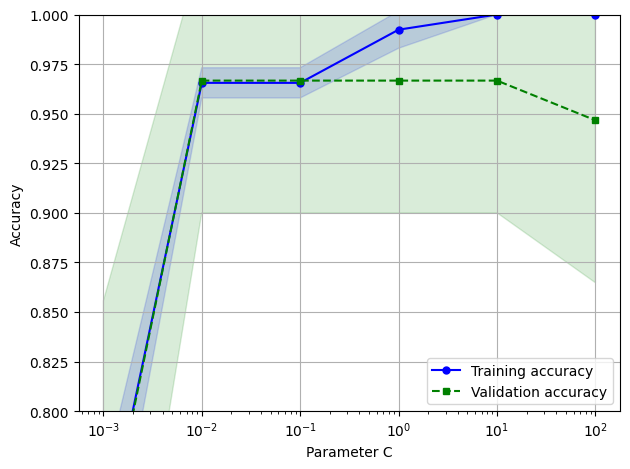

In [66]:
plot_validation_curve(param_range,lr)

O melhor valor aparenta ser C=0.1, porém iremos realizar um GridSearch para confirmar, além de confirmar outros hiperparâmetros

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
param_grid = {
    'C': param_range,  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
}

gs = GridSearchCV(estimator=lr,
                  param_grid=param_grid,
                  scoring='accuracy',
                  refit=True,
                  cv=10)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9666666666666668
{'C': 0.01, 'penalty': 'l2'}


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

Melhor valor: C = 0.01 e penalty='l2'

In [52]:
lr = LogisticRegression(C=0.01, penalty='l2')

In [53]:
from sklearn.model_selection import cross_val_score

In [54]:
scores = cross_val_score(estimator=lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print(f'CV accuracy scores: {scores}')
print(f'CV accuracy: {np.mean(scores):.3f} '
      f'+/- {np.std(scores):.3f}')

CV accuracy scores: [1.         0.83333333 1.         1.         0.83333333 1.
 1.         1.         1.         1.        ]
CV accuracy: 0.967 +/- 0.067


In [55]:
lr.fit(X_train,y_train)

LogisticRegression(C=0.01)

In [56]:
y_pred = lr.predict(X_test)

In [57]:
from sklearn.metrics import classification_report, confusion_matrix

In [58]:
len(y_pred)

12

In [59]:
print(classification_report(y_test,y_pred, target_names=["ADL","Fall"]))

              precision    recall  f1-score   support

         ADL       1.00      1.00      1.00         6
        Fall       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



In [67]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from numpy import interp

In [68]:
def plot_ROC_curve(X_train, y_train, estimator):
    X_train2 = X_train[:, [4, 14]]
    
    cv = list(StratifiedKFold(n_splits=3).split(X_train, y_train))

    fig = plt.figure(figsize=(7, 5))

    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    all_tpr = []

    for i, (train, test) in enumerate(cv):
        probas = estimator.fit(X_train2[train],
                             y_train[train]).predict_proba(X_train2[test])

        fpr, tpr, thresholds = roc_curve(y_train[test],
                                         probas[:, 1],
                                         pos_label=1)
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr,
                 tpr,
                 label=f'ROC fold {i+1} (area = {roc_auc:.2f})')

    plt.plot([0, 1],
             [0, 1],
             linestyle='--',
             color=(0.6, 0.6, 0.6),
             label='Random guessing (area = 0.5)')

    mean_tpr /= len(cv)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, 'k--',
             label=f'Mean ROC (area = {mean_auc:.2f})', lw=2)
    plt.plot([0, 0, 1],
             [0, 1, 1],
             linestyle=':',
             color='black',
             label='Perfect performance (area = 1.0)')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.legend(loc='lower right')

    plt.tight_layout()
    # plt.savefig('figures/06_10.png', dpi=300)
    plt.show()

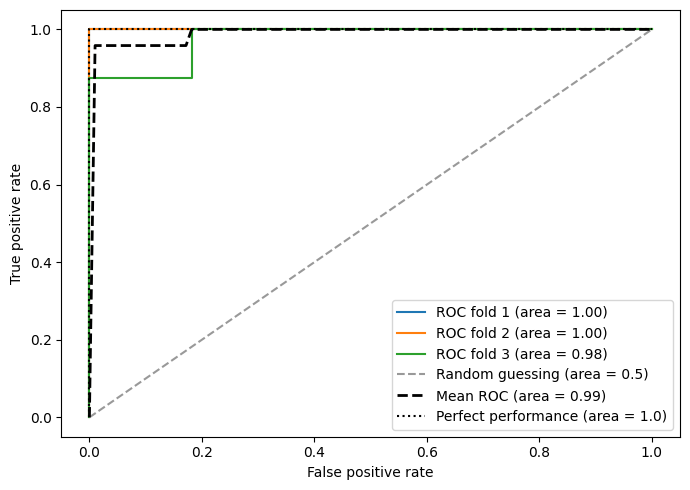

In [69]:
plot_ROC_curve(X_train,y_train,lr)

Verificando a quantidade de exemplos e features no dataset de treino

In [74]:
print("Quantidade de exemplos:",X_train.shape[0])
print("Quantidade de features:",X_train.shape[1])

Quantidade de exemplos: 58
Quantidade de features: 25


Temos muitas features para poucos exemplos, logo o modelo pode estar complexo demais

Para trabalhar isso, iremos usar métodos de Feature Selection (SBS + Random Forest) e Dimensionality Reduction (PCA)

Trabalhando com SBS

In [75]:
from sklearn.base import clone
from itertools import combinations
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS:
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [92]:
def apply_SBS(estimator, k_features):
    # selecting features
    sbs = SBS(estimator, k_features=k_features)
    sbs.fit(X_train, y_train)

    # plotting performance of feature subsets
    k_feat = [len(k) for k in sbs.subsets_]
    
    best_index = k_feat.index(11)
    
    plt.plot(k_feat, sbs.scores_, marker='o')
    plt.ylim([0.7, 1.02])
    plt.ylabel('Accuracy')
    plt.xlabel('Number of features')
    plt.grid()
    plt.tight_layout()
    plt.show()
    
    return sbs.subsets_[best_index]

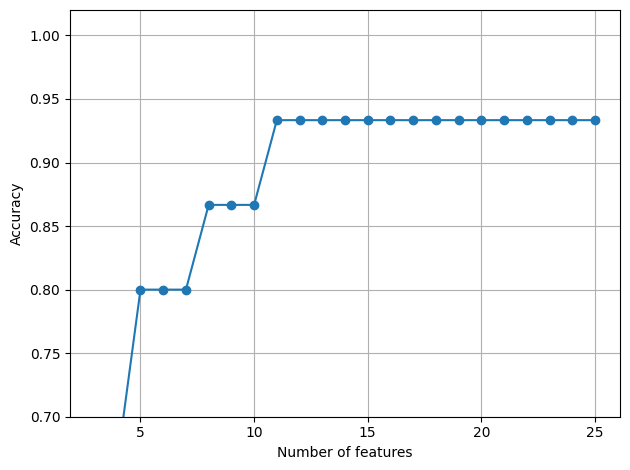

In [111]:
best_features = apply_SBS(lr,3)

O gráfico acima mostra que para chegar na máxima acurácia bastam apenas 11 features das 25

In [112]:
best_features

(0, 1, 2, 4, 5, 9, 10, 13, 17, 18, 20)

In [96]:
print(df_train.columns[list(best_features)])

Index(['Sv_mean', 'Sv_std', 'Sv_max', 'Sv_range', 'Sv_energy', 'Ax_min',
       'Ax_range', 'Ay_std', 'Ay_energy', 'Az_mean', 'Az_max'],
      dtype='object')


Tentando com RandomForest

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

 1) Ay_energy                      0.220371
 2) Sv_max                         0.153234
 3) Ay_range                       0.129299
 4) Sv_min                         0.110126
 5) Sv_energy                      0.109635
 6) Ay_max                         0.055993
 7) Az_energy                      0.048153
 8) Sv_std                         0.038561
 9) Az_max                         0.035373
10) Az_min                         0.019539
11) Az_mean                        0.018226
12) Ax_energy                      0.016928
13) Ax_max                         0.010980
14) Ay_std                         0.007737
15) Ay_min                         0.006047
16) Class                          0.004773
17) Sv_range                       0.003385
18) Az_std                         0.002765
19) Ax_std                         0.002587
20) Ax_range                       0.002171
21) Duration                       0.001312
22) Ax_min                         0.000905
23) Az_range                    

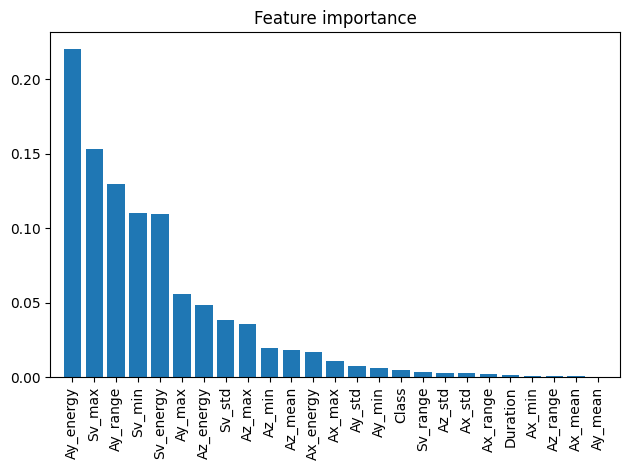

In [100]:
forest.fit(X_train, y_train)
importances = forest.feature_importances_
feat_labels = df_train.columns[1:]
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
# plt.savefig('figures/04_10.png', dpi=300)
plt.show()

Treinar o modelo novamente utilizando as features selecionadas pelo SBS

In [113]:
best_features = list(best_features)

In [114]:
df_train_sbs = df_train.iloc[:,best_features]

In [116]:
df_train_sbs.loc[:,'Class'] = df_train.loc[:,"Class"]

In [117]:
df_train_sbs.head()

,Sv_mean,Sv_std,Sv_max,Sv_range,Sv_energy,Ax_min,Ax_range,Ay_std,Ay_energy,Az_mean,Az_max,Class
0,1.028018,0.156580,1.474426,0.777010,269.228791,-0.320322,0.708687,0.203866,206.075485,-0.354364,0.126999,0
1,1.018103,0.150227,1.546876,0.932725,335.712998,-0.234346,1.078383,0.236213,256.768315,-0.245687,0.163600,0
2,1.038808,0.161866,1.771360,1.162935,317.201370,-0.219361,0.637696,0.180082,262.215673,-0.321627,0.103908,0
3,1.075199,0.157467,1.532783,0.860331,285.740567,-0.145176,0.985038,0.567561,141.520617,-0.533385,0.063622,0
4,1.049108,0.156039,1.541192,0.848529,349.842868,-0.173180,1.142988,0.363238,202.681097,-0.415437,0.143211,0


In [118]:
df_test_sbs = df_test.iloc[:,list(best_features)]

In [119]:
df_test_sbs.loc[:,'Class'] = df_test.loc[:,"Class"]

/tmp/ipykernel_36/1196964222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_sbs.loc[:,'Class'] = df_test.loc[:,"Class"]


In [120]:
df_test_sbs.head()

,Sv_mean,Sv_std,Sv_max,Sv_range,Sv_energy,Ax_min,Ax_range,Ay_std,Ay_energy,Az_mean,Az_max,Class
0,0.974633,0.577838,2.944164,3.080701,180.682937,-0.192761,1.073667,0.317057,55.067153,0.711625,2.313328,0
1,1.034797,0.418736,2.535667,2.665187,418.529163,-1.437567,2.156739,0.379780,320.109220,0.247052,0.934310,0
2,1.125313,0.476343,3.731273,4.183603,606.024962,-0.701054,1.772123,0.477054,398.508099,-0.472086,0.366295,0
3,1.023122,0.424218,2.634675,3.004148,383.789234,-1.397023,2.317797,0.403938,202.082612,0.358620,1.664929,0
4,1.030468,0.437429,2.641648,2.981017,1913.458418,-1.902290,2.635988,0.403824,319.368396,0.575388,1.639418,0


In [121]:
X_train = df_train_sbs.drop('Class',axis=1)
y_train = df_train_sbs['Class']
X_test = df_test_sbs.drop('Class',axis=1)
y_test = df_test_sbs['Class']

In [122]:
X_train_std = scaler.fit_transform(X_train)

In [123]:
X_test_std = scaler.transform(X_test)

In [124]:
scores = cross_val_score(estimator=lr,
                         X=X_train_std,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print(f'CV accuracy scores: {scores}')
print(f'CV accuracy: {np.mean(scores):.3f} '
      f'+/- {np.std(scores):.3f}')

CV accuracy scores: [1.         0.83333333 1.         1.         0.83333333 1.
 1.         1.         1.         0.8       ]
CV accuracy: 0.947 +/- 0.082


In [126]:
lr.fit(X_train_std,y_train)

LogisticRegression(C=0.01)

In [127]:
y_pred = lr.predict(X_test_std)

In [128]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



Ainda temos o resultado "perfeito" para a classificação, mesmo reduzindo o número de features para 11. Talvez seja melhor utilizar uma técnica de redução de dimensionalidade. Nesse caso, usaremos o PCA.

In [131]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [135]:
pipe_lr = make_pipeline(PCA(n_components=2),
                        LogisticRegression(penalty='l2', C=0.01))

In [136]:
scores = cross_val_score(estimator=pipe_lr,
                         X=X_train_std,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print(f'CV accuracy scores: {scores}')
print(f'CV accuracy: {np.mean(scores):.3f} '
      f'+/- {np.std(scores):.3f}')

CV accuracy scores: [1.         0.83333333 1.         1.         0.83333333 1.
 1.         1.         1.         0.8       ]
CV accuracy: 0.947 +/- 0.082


In [139]:
pipe_lr.fit(X_train_std,y_train)

Pipeline(steps=[('pca', PCA(n_components=2)),
                ('logisticregression', LogisticRegression(C=0.01))])

In [140]:
y_pred = pipe_lr.predict(X_test_std)

In [141]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



In [142]:
pipe_svc = make_pipeline(PCA(n_components=2),
                        SVC(random_state=1))

In [143]:
scores = cross_val_score(estimator=pipe_svc,
                         X=X_train_std,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print(f'CV accuracy scores: {scores}')
print(f'CV accuracy: {np.mean(scores):.3f} '
      f'+/- {np.std(scores):.3f}')

CV accuracy scores: [1.         0.83333333 1.         1.         0.83333333 1.
 1.         1.         0.8        1.        ]
CV accuracy: 0.947 +/- 0.082


In [144]:
pipe_svc.fit(X_train_std,y_train)

Pipeline(steps=[('pca', PCA(n_components=2)), ('svc', SVC(random_state=1))])

In [145]:
y_pred = pipe_svc.predict(X_test_std)

In [146]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

